## Project 3: Wrangle and Analyze Data - WeRateDogs

### Table of contents:

 1. Data Gathering
 
 2. Assessing Data
 
 3. Cleaning Data
 
 4. Analysis

In [1]:
#Import neccessary packeges
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Gathering

In [2]:
#Load twitter-archive-enhanced.csv
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Load image_predictions.tsv
import requests
import io
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url).content
image_predictions = pd.read_csv(io.StringIO(r.decode('utf-8')), delimiter='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
#Load tweet-json.txt
json_url='https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
r=requests.get(json_url)
data=r.content.decode('utf-8')
tweets_json=pd.read_json(data, lines=True)
tweets_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [5]:
#Keep only columns that are relevant for the analysis
tweets_json=tweets_json[['id','display_text_range','favorite_count','retweet_count']]
tweets_json.head()

,id,display_text_range,favorite_count,retweet_count
0,892420643555336193,"[0, 85]",39467,8853
1,892177421306343426,"[0, 138]",33819,6514
2,891815181378084864,"[0, 121]",25461,4328
3,891689557279858688,"[0, 79]",42908,8964
4,891327558926688256,"[0, 138]",41048,9774


## Assessing Data

### 1. Assessing twitter_archive dataset

- Visual assessment
- Programmatic assessment aimed at:
    
    - Find missing values
    
    - Find duplicated observations
    
    - Assess tidiness of data

In [6]:
#Visual assessment
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
#Assessing data types and looking for missining values
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
#Further assesment of missing values in 'dooggo', 'foofer', 'pupper', 'puppo'
twitter_archive['doggo'].value_counts(), twitter_archive['floofer'].value_counts(), twitter_archive['pupper'].value_counts(), twitter_archive['puppo'].value_counts()

(None     2259
 doggo      97
 Name: doggo, dtype: int64, None       2346
 floofer      10
 Name: floofer, dtype: int64, None      2099
 pupper     257
 Name: pupper, dtype: int64, None     2326
 puppo      30
 Name: puppo, dtype: int64)

In [9]:
#Assessing column 'name'
twitter_archive['name'].value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Lola             10
Tucker           10
Penny            10
Winston           9
Bo                9
Sadie             8
the               8
Buddy             7
Bailey            7
an                7
Toby              7
Daisy             7
Milo              6
Jax               6
Stanley           6
Rusty             6
Jack              6
Scout             6
Bella             6
Leo               6
Dave              6
Oscar             6
Koda              6
Sammy             5
               ... 
unacceptable      1
Zoe               1
Roscoe            1
Hermione          1
Ambrose           1
Cheesy            1
Murphy            1
Willy             1
Heinrich          1
Glenn             1
Tito              1
Beemo             1
Wishes            1
Mookie            1
Comet             1
Sonny             1
Stark             1
Edmund            1
Tyrus             1


In [10]:
#Assessing duplicates
twitter_archive.duplicated().any()

False

In [11]:
#Assessing whether a tweet is a retweet or not
twitter_archive[['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].isnull().any()

retweeted_status_id           True
retweeted_status_user_id      True
retweeted_status_timestamp    True
dtype: bool

The columns that contain values are retweets and not actual tweets of WeRateDogs. Only the columns that are NaN have to be kept.

### Cleaning issues:

- The column 'timestamp' is an object and not DateTime.

- The 'name' column contains values that are not names.

- The columns 'doggo', 'floofer', 'pupper' and 'puppo' can be joint in a unique column 'stage' in order to have tidier dataset. Observations with multiple stages can be labeled as 'Multiple Stages'.

- The columns that contain values are retweets and not actual tweets of WeRateDogs. Only the columns that are NaN have to be kept.

- Some ratings contain decimals, replace values in column 'rating_numerator' with actual values containing decimals

- There are missing values in 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'. The columns can be dropped since they are not relevant for analysis purpose.

### 2. Assessing image_predictions dataset:

 - Visual assessment
 
 - Programmatic assessment aimed at:
 
     - Assess datatypes and missing values.
     - Assess if there are any duplicated observations.

In [12]:
#Visual assessment
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
#Assess datatypes and missing values
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
#Assess duplicates
image_predictions.duplicated().any()

False

### Cleaning issues:
- The predictive model labeled some dogs as objects. Find only 'True' observations (labeled as dogs) and copy the breed name in a new column.
- Replace False with 'None' in the new column.
- Capitalize initials and replace '_' with whitespaces.

### 3. Assessing tweets_json dataset:

 - Visual assessment
 
 - Programmatic assessment aimed at:
 
     - Assess datatypes
     - Spot missing values
     - Assess duplicates

In [15]:
tweets_json

,id,display_text_range,favorite_count,retweet_count
0,892420643555336193,"[0, 85]",39467,8853
1,892177421306343426,"[0, 138]",33819,6514
2,891815181378084864,"[0, 121]",25461,4328
3,891689557279858688,"[0, 79]",42908,8964
4,891327558926688256,"[0, 138]",41048,9774
5,891087950875897856,"[0, 138]",20562,3261
6,890971913173991426,"[0, 140]",12041,2158
7,890729181411237888,"[0, 118]",56848,16716
8,890609185150312448,"[0, 122]",28226,4429
9,890240255349198849,"[0, 133]",32467,7711


In [16]:
#Assessing datatypes and missing values
tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 4 columns):
id                    2354 non-null int64
display_text_range    2354 non-null object
favorite_count        2354 non-null int64
retweet_count         2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 92.0+ KB


In [17]:
#Assessing 'display_text_range'
type(tweets_json['display_text_range'][1])

list

### Cleaning issues:

- The column 'display_text_range' is a list, values contained in the list have to be extracted. Only the last number, which indicates the number of characters in each tweet, is useful for analysis purpose, so it will be the only value kept.
- Since the column 'display_text_range' is a list it is not possible to assess if there are any duplicates. Before performing such operations the values contained in the list have to be extracted.

## Cleaning Data

### 1. Cleaning twitter_archive DataFrame:

**1.1** The column 'timestamp' is an object and not DateTime.
 
**1.2** The 'name' column contains values that are not names.
 
**1.3** The columns 'doggo', 'floofer', 'pupper' and 'puppo' can be joint in a unique column 'stage' in order to have tidier dataset. Observations with multiple stages can be labeled as 'Multiple Stages'.

**1.4** The columns that contain values are retweets and not actual tweets of WeRateDogs. Only the columns that are NaN have to be kept.

**1.5** Some ratings contain decimals, replace values in column 'rating_numerator' with actual values containing decimals

**1.6** There are missing values in 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'. The columns can be dropped since they are not relevant for analysis purpose.

In [26]:
#Create copy of DataFrame
twitter_archive_clean = twitter_archive.copy()

#### 1.1
#### Define: Timestamp is an object not DateTime: The 'timestamp' column has to be transformed into DateTime

#### Code

In [27]:
#Create DateTime column
twitter_archive_clean['datetime'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [28]:
#Drop 'timestamp' column and keep only datetime
twitter_archive_clean.drop('timestamp', axis=1, inplace=True)

#### Test

In [29]:
'timestamp' in twitter_archive_clean.columns

False

#### 1.2 
#### Define: The 'name' column contains values that are not names. Create regex expression to identify words starting with lower case letters and replace the with 'None'

#### Code

In [30]:
twitter_archive_clean['name']=twitter_archive_clean['name'].str.replace(r'\b[a-z][a-zA-Z0-9]*\b', 'None')

#### Test

In [31]:
twitter_archive_clean['name'].value_counts()

None         854
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
Sadie          8
Daisy          7
Bailey         7
Toby           7
Buddy          7
Leo            6
Stanley        6
Oscar          6
Jax            6
Milo           6
Dave           6
Jack           6
Koda           6
Scout          6
Rusty          6
Bella          6
Louis          5
Gus            5
Larry          5
Oakley         5
            ... 
Wiggles        1
Cupid          1
Gert           1
Zoe            1
Roscoe         1
Akumi          1
Gordon         1
Mauve          1
Mookie         1
Rose           1
Sprout         1
Arya           1
Smiley         1
Stewie         1
Glenn          1
Tito           1
Beemo          1
Wishes         1
Comet          1
Dutch          1
Stark          1
Edmund         1
Heinrich       1
Tyrus          1
Siba           1
Jeffri         1
Chaz           1
Stephanus     

#### 1.3 

#### Define: The columns 'doggo', 'floofer', 'pupper' and 'puppo' can be joint in a unique column 'stage' in order to have tidier dataset. Observations with multiple stages can be labeled as 'Multiple Stages'.

#### Code

In [32]:
#Extract stages
df1 = twitter_archive_clean['text'].str.extractall(r'(pupper | puppo | floofer | doggo)')
#Unstack to crate multiple columns
df1 = df1.unstack().add_prefix('stage_')
#Drop first level 
df1.columns = df1.columns.droplevel(0)
#Check results
df1.head()

match,stage_0,stage_1,stage_2
9,doggo,None,None
12,puppo,None,None
14,puppo,None,None
29,pupper,None,None
43,doggo,None,None


In [33]:
#Join dataframe on index
twitter_archive_clean = twitter_archive_clean.join(df1)
#Check results
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,datetime,stage_0,stage_1,stage_2
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01 16:23:56,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01 00:17:27,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31 00:18:03,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30 15:58:51,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29 16:00:24,NaN,NaN,NaN


In [34]:
#Create column stage to fill with stage name if unique or multiple stage if multiple stages are present
#Create column stage and fill it with stage_0
twitter_archive_clean['stage']=twitter_archive_clean['stage_0']
#Fill 'NaN' with string 'No Stage'
twitter_archive_clean[['stage_0','stage_1','stage_2']]=twitter_archive_clean[['stage_0','stage_1','stage_2']].fillna('No Stage')
#If multiple stages are present fill with 'Multiple Stages'
twitter_archive_clean.loc[(twitter_archive_clean['stage_1']!='No Stage')|(twitter_archive_clean['stage_2']!='No Stage'), 'stage']='Multiple Stages'
#Check results
twitter_archive_clean['stage'].value_counts()

pupper             160
 doggo              88
 puppo              16
Multiple Stages     11
 floofer             3
Name: stage, dtype: int64

In [35]:
#Remove whitespaces #Uppercase initials
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].str.strip()
#Uppercase initials
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].str.capitalize()

#### Test

In [36]:
twitter_archive_clean['stage'].value_counts()

Pupper             160
Doggo               88
Puppo               16
Multiple stages     11
Floofer              3
Name: stage, dtype: int64

#### 1.4 

#### Define: The columns that contain values are retweets and not actual tweets of WeRateDogs. Only the columns that are NaN have to be kept.

#### Code

In [272]:
#Keep only NaN in selected columns
twitter_archive_clean=twitter_archive_clean[(twitter_archive_clean['retweeted_status_id'].isnull())&(twitter_archive_clean['retweeted_status_user_id'].isnull())&(twitter_archive_clean['retweeted_status_timestamp'].isnull())]

#### Test

In [273]:
#Check results: only NaN should be present is selected columns
twitter_archive_clean[['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp']].notnull().any()

retweeted_status_id           False
retweeted_status_user_id      False
retweeted_status_timestamp    False
dtype: bool

#### 1.5 

#### Define: Some ratings contain decimals, replace values in column 'rating_numerator' with actual values containing decimals.

#### Code

In [274]:
#Extract ratings with decimals
twitter_archive_clean['rating_decimals']=twitter_archive_clean['text'].str.extract(r"(\d+\.\d*\/\d+)", expand=True)
twitter_archive_clean['rating_decimals'].value_counts()
#Slice string to get only numerator, string has to be sliced from start untill '/', then slice has to stop at -3
twitter_archive_clean['rating_decimals']=twitter_archive_clean['rating_decimals'].str.slice(0,-3)

In [275]:
#Set correct datatype
twitter_archive_clean['rating_numerator']=twitter_archive_clean['rating_numerator'].astype('float')

In [276]:
#Replace not correct rating numerators
twitter_archive_clean.loc[twitter_archive_clean['rating_decimals'].notnull(), 'rating_numerator'] = twitter_archive_clean['rating_decimals']

#### Test

In [37]:
twitter_archive_clean['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

#### 1.6 

#### Define: There are missing values in 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'. The columns can be dropped since they are not relevant for analysis purpose.

#### Code

In [29]:
#Drop non relevant columns
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)
twitter_archive_clean.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'datetime', 'date', 'time', 'stage'],
      dtype='object')

#### Test

In [107]:
#Checking results
twitter_archive_clean.columns

Index(['tweet_id', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'datetime', 'date', 'time',
       'stage'],
      dtype='object')

### 2. Cleaning image_predictions DataFrame:

**2.1** The predictive model labeled some dogs as objects. Find only 'True' observations (labeled as dogs) and copy the breed name in a new column.

**2.2** Replace False with 'None' in the new column.
    
**2.3** Upper case initials and replace '_' with whitespaces.

In [40]:
#Copy DataFrame
im_pred_clean=image_predictions.copy()

#### 2.1 

#### Define: The predictive model labeled some dogs as objects. Find only 'True' observations (labeled as dogs) and copy the breed name in a new column.

1. Convert 'p1_dog', 'p2_dog', 'p3_dog' from boolean to strings.
2. Create new columns 'dog_1', 'dog_2', 'dog_3'.
3. If not dog replace with 'None'.


#### Code

In [41]:
#Convert strings
im_pred_clean[['p1_dog','p2_dog','p3_dog']]=im_pred_clean[['p1_dog','p2_dog','p3_dog']].astype(str)
#Create new columns
im_pred_clean[['dog_1','dog_2','dog_3']]=im_pred_clean[['p1','p2','p3']]

In [42]:
#If not dog replace with 'None'
im_pred_clean.loc[im_pred_clean['p1_dog'] == 'False', 'dog_1'] = 'None'
im_pred_clean.loc[im_pred_clean['p2_dog'] == 'False', 'dog_2'] = 'None'
im_pred_clean.loc[im_pred_clean['p3_dog'] == 'False', 'dog_3'] = 'None'

In [43]:
#Capitalize
im_pred_clean['dog_1']=im_pred_clean['dog_1'].str.capitalize()
im_pred_clean['dog_2']=im_pred_clean['dog_2'].str.capitalize()
im_pred_clean['dog_3']=im_pred_clean['dog_3'].str.capitalize()
#Replace '_' with whitespace
im_pred_clean['dog_1']=im_pred_clean['dog_1'].str.replace('_', ' ')
im_pred_clean['dog_2']=im_pred_clean['dog_2'].str.replace('_', ' ')
im_pred_clean['dog_3']=im_pred_clean['dog_3'].str.replace('_', ' ')

#### Test

In [44]:
#Check results
im_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_1,dog_2,dog_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh springer spaniel,Collie,Shetland sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Redbone,Miniature pinscher,Rhodesian ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German shepherd,Malinois,Bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian ridgeback,Redbone,Miniature pinscher
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature pinscher,Rottweiler,Doberman


In [46]:
#Drop not relevant columns
im_pred_clean.drop(['img_num','p1','p1_dog','p1_conf','p2','p2_dog','p2_conf', 'p3','p3_dog','p3_conf'], axis=1, inplace=True)
im_pred_clean.head()

,tweet_id,jpg_url,dog_1,dog_2,dog_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel,Collie,Shetland sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,Miniature pinscher,Rhodesian ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd,Malinois,Bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback,Redbone,Miniature pinscher
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature pinscher,Rottweiler,Doberman


#### 3. Cleaning tweets_json DataFrame:

**3.1** The column 'display_text_range' is a list, values contained in the list have to be extracted. Only the last number, which indicates the number of characters in each tweet, is useful for analysis purpose, so it will be the only value kept.

**3.2** Since the column 'display_text_range' is a list it is not possible to assess if there are any duplicates. Before performing such operations the values contained in the list have to be extracted.

In [46]:
#Copy DataFrame
tweets_json_clean = tweets_json.copy()

#### 3.1 

#### Define: The column 'display_text_range' is a list, values contained in the list have to be extracted. Only the last number, which indicates the number of characters in each tweet, is useful for analysis purpose, so it will be the only value kept.

#### Code

In [48]:
#Create Series and extract last values
text_lenght=tweets_json_clean['display_text_range'].apply(pd.Series)
tweets_json_clean['text_lenght']=text_lenght[1]

In [49]:
#Drop 'display_text_range'
tweets_json_clean.drop('display_text_range', axis=1, inplace=True)

,id,favorite_count,retweet_count,text_lenght
0,892420643555336193,39467,8853,85
1,892177421306343426,33819,6514,138
2,891815181378084864,25461,4328,121
3,891689557279858688,42908,8964,79
4,891327558926688256,41048,9774,138


#### Test

In [50]:
tweets_json_clean.head()

,id,favorite_count,retweet_count,text_lenght
0,892420643555336193,39467,8853,85
1,892177421306343426,33819,6514,138
2,891815181378084864,25461,4328,121
3,891689557279858688,42908,8964,79
4,891327558926688256,41048,9774,138


#### 3.2 
#### Define: Since the column 'display_text_range' is a list it is not possible to assess if there are any duplicates. Before performing such operations the values contained in the list have to be extracted.

In [51]:
tweets_json_clean.duplicated().any()

False

There are no duplicated observations in tweets_json DataFrame.

## Create unique DataFrame

#### Inconsistency issue: 

Rename id col for consistecy with other dataframes

#### Code

In [52]:
#Rename id col for consistecy with other dfs
tweets_json_clean.rename(index=str, columns={'id':'tweet_id'}, inplace=True)

#### Test

In [53]:
tweets_json_clean.head()

,tweet_id,favorite_count,retweet_count,text_lenght
0,892420643555336193,39467,8853,85
1,892177421306343426,33819,6514,138
2,891815181378084864,25461,4328,121
3,891689557279858688,42908,8964,79
4,891327558926688256,41048,9774,138


In [53]:
#merge 3 DataFrames
df = twitter_archive_clean.merge(im_pred_clean,on='tweet_id').merge(tweets_json_clean,on='tweet_id')
df.head()

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,datetime,date,time,stage,jpg_url,dog_1,dog_2,dog_3,favorite_count,retweet_count,text_lenght
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01 16:23:56,2017-08-01,16:23:56,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,None,None,39467,8853,85
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01 00:17:27,2017-08-01,00:17:27,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,Pekinese,Papillon,33819,6514,138
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31 00:18:03,2017-07-31,00:18:03,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,Malamute,Kelpie,25461,4328,121
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30 15:58:51,2017-07-30,15:58:51,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,None,Labrador retriever,None,42908,8964,79
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29 16:00:24,2017-07-29,16:00:24,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,English springer,German short-haired pointer,41048,9774,138


In [54]:
#Save DataFrame
df.to_csv('twitter_archive_master.csv')

## Analysis

1. What are the most popular breeds?
2. Is there any time pattern in popularity metrics?
3. Is there any correlation between popularity metrics and the lenght of the text?

### 1. What are the most popular breeds?

In [55]:
# Gropuby df by breed
breed=df.groupby(by='dog_1')[['retweet_count','favorite_count']].sum()
#Drop 'None' values
breed=breed.drop('None')
#Select the most popular 10 breeds
breed_favorite=breed.sort_values(by='favorite_count', ascending=False)['favorite_count'].head(10)
breed_retweet=breed.sort_values(by='retweet_count', ascending=False)['retweet_count'].head(10)

Text(0.5,1,'Retweet count by breed')

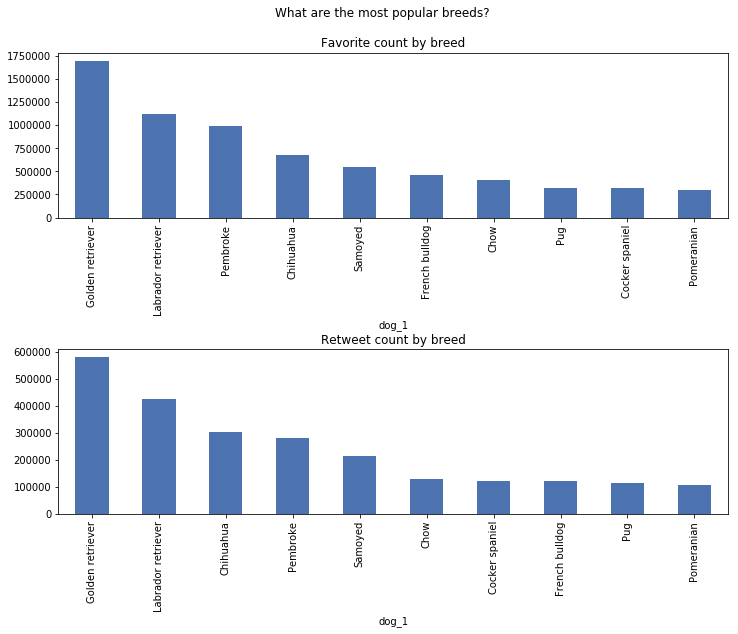

In [56]:
#Set matplotlib style
plt.style.use('seaborn-deep')
#Plotting
plt.figure()
figure, axes = plt.subplots(2, 1)
figure.set_figheight(8)
figure.set_figwidth(12)
figure.suptitle('What are the most popular breeds?')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.8)
breed_favorite.plot(kind='bar', ax=axes[0]).set_title('Favorite count by breed')
breed_retweet.plot(kind='bar', ax=axes[1]).set_title('Retweet count by breed')

In [57]:
#Save figure
plt.savefig('breed_popularity.png')

In [58]:
#Retrieve popularity metrics for Golden retriever
df.query('dog_1 == "Golden retriever"')[['favorite_count','retweet_count']].describe()

,favorite_count,retweet_count
count,150.000000,150.000000
mean,11310.846667,3874.466667
std,12898.873626,4510.164600
min,0.000000,54.000000
25%,3104.250000,1219.000000
50%,7191.000000,2431.500000
75%,15794.000000,4553.000000
max,85011.000000,27728.000000


In [59]:
#Retrieve data for most popular Golden retriever
df.query('dog_1=="Golden retriever"')[['favorite_count','retweet_count','name','rating_numerator']].max()[['favorite_count','retweet_count','name','rating_numerator']]

favorite_count      85011
retweet_count       27728
name                 Zoey
rating_numerator      143
dtype: object

In [60]:
#Display image of most popular Golden retriever
jpg_url = df.query('dog_1=="Golden retriever"')[['jpg_url','favorite_count','name']].max()['jpg_url']
from ipywidgets import Image
image=requests.get(jpg_url).content
Image(value=requests.get(jpg_url).content)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x04\xb0\x03\x85\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x00\x01\x04\x05\x06\x07\x08\xff\xc4\x00\x1a\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf5\xc9\xd1\x9f\xc9\xe8\xaa\xabK\xba\xb2I"\xee\xae\xa4\x90\xb9(\xb9V\x92\\%\xd5\xad\xc9*]YW!.\xa1u!.\xae%\xca\xab\x92\x12HI!$\xb2\xa5\xc2\xa4\x84\x97\n\xb9\t$I$Z\x92\x12]\x17%%\xd5\xca\xab\xab*HI"\xc9!$\x89$\x84\xab\x85K\x85K\xa2I\tW\n\xab\x85I\tWD\xab\x80\xcb\xa2\xaa\xe8\x95tU\x15\x00&\x00\xd5\xd0 `P\xdd\x02$\x11K5\x9e\x82I\xd7\x0c\xcf\xa9\x1c\xba.HI$\\\x96K\xabI$Yui$\x96\xdc\x97\x15r\x17$\xa9rD\xba\xb2U\xc2J\xb2I\t%\x92IRI\x12H\\\x92\xaa\xea\x17R\xc9W\t$I$%HK\xab$\x90\x92BI\t$\xaa\x92\x12HItI!%\xc2\xa4\x84\x92\x12\xae\x15.\x89%\x83.\x96U\xd2T\xb8T\xba*HUX\x92\xae\x8a\x92\x8a\x12\x00j\xc4\x11!\x06\xacR\x80\x82ZY\x01\xe8eN\xb8zZ<\xbag\xa2\xa8\x92\xac\xbb\xa8\x97ue\\\x8b.\xac\xb9!$\xb2\xeaB]YrBX\xdcK\x92\xa4\x96T\x90\x97!$\x84\x92\x12H\\\xa9R]%\xca\x85\xca\x8brD\x92B\xa5\xc2I\t$\xa9$\x89$%\\\xa9R\x12\xea\x17%\x12\\$\x90\x92BJ\xb2\xa4\x84\xab\x85I\t%\x12\xae\x15W\n\x92\x15$*HU]\x15W@\x81\x80"BP\x10\x946( B\xa0\xb3\\z)\'^m\x8bo\x1e\xb9\xa8\x85$\xab\x8b\xba\x95rB\xee\xa1r\x89j\xea\xc9$%\xd5\x92H\x14\xa8\\\xab%\xc8K\xa8I,\xab\x90\x92D\x92Z\xd4\x90\x92K.J$\x91e\xc8\x92HIp\xa9p\xab\x96U\\\xaa\x97\n\xba\x91$\x84\x95*\\\x84\x92\x89%\x92HI!*\xe1RBU\xc2\xa4\x84\xa9\t%\x12T$\x90\x95!RQ*\xe8\x1a\xba(lJ\x02\x10@\xa9\x04H\x01\x02\x00\x16k_G*t\xc1i\xcb\xab\x96\xf2\x83W\x15%\x92\xea\xc9.\x12H\xb7%\xc5\\\x85\xc9*K\x84\xab\x84\xba\xb8\xa9r\xa5\xd5\x97R\x17%\x17%\x95%\x92\xae\x15.\x12\xa5\x17*\x17\x06\x86@\xaadU#\xe2`\xf9\x9e\x0f\xb4\xc1\xb4\xaa\x1fH\x83\xe2*\xb4L\xf5\x1a"\x04\xd3x\xec\xd72Q\xae\xf1\xc3d\xc2\xc3T\xcb+T\xcdf\x8aD\x1f\x11c\xa9B>\x902\xe9\xac\x94\x9a\xeb\x1c6\xcez\xce\x9dr\xc5z\xa1\xcc\x14\xe9\x0f:\x97\xa6\x1c\xeb:\x13\x9fi\xaae\xa3D\xc7F\xc0L\xa3\x08%,\x80\xf4RN\x98-9\xdf\xcb`\x9d9\xd6\xaa\xe4\x92\xe4\x8a %\xb9%]\xc8Ip\x95p\x92\x89d\x91$\x92$\xb9l\x92D\x92\x92\xecj\x8e\xd5\x06\xc4\x0ci\xac\x81[\x97\x92\x1aAU\x0c\x11"X\xd1\x16k\xab\xa0\x90f\x92\xa6\xd0\xc1\x81B\x15\x81\x85k\x01\x8a\xa2(\xae\xc5\\\x10\xa8h&&\xc2\x82D\x13\x02\xaa\xa8\x97P2U\x8db\x180\xb30jIP\xba%\x87Ej\xba0I\n\x10n\xc0\x97p-W\xd0:O;\xc3\xfaG\xcf\xec\xcfZ\xc3\x9e\xb1\x8e\xbd\x15\x89\x1fR\xf1[\xc7\n\x10ct\x16\x1a\x9e\x96T\xeb\x82\xd1\x97G-\xb7>\x94J\xba\xb1\x83\x8a\xa8tD4\xcc\xe2j\xbc\x91u\xde\x06\x1a\xab\x1c6VH\xbai5Z"\xa2\x10\xd4\x94`\x12E\xb5q%\xb2\x80\x85\x80\xdd\x90\xb8`\x92\xc0mx\xd4\x8a\xba\x12\xec(!\x87J\xb2\x14\x19c\x0c\x80\xca\x1b\xa9\x042\x8b\xb8T\x164\x18\x89@\xd5\x89wEUEA\x8d\xc0F\x14\x04\x82T\x96\xb5(\x8b:\x12\x10\xd9\x01\x90\x19rJ\xaa\xb5\xbb\x19G\x04\xa4\x1a!*\xe5\xda>\xd7\xc5MgO\xa0\xf3\x1d\x8b\x02?\xa5bx:\x9a\xbb6x\xfa3B\xack:\xda\x8dOO\x06u\xc6n\x8f\x0f\xa1\xc7\xa7G\x16I+im\x8a\xba\x92\x15\x08\xab\xadl\xa9.\xa2\x99,\xab\x91`\x95\xd0\x9c\x84\x12\xb4X\xb4\x14,\x84\xb5\x1a\xe4\xb2S\x16\x10PUCc\xa8!!\xc0b\xf8\xf6\xf7\xe7\xcd\xbaW^\xd6\x14\xce\x04\xaa\xc1\x06\xa9*\\\x04\xc4\x81\xb9*U\xc8\xab\x90\x80`\xb2\xe8\x90e\xd0WWV\x17\x0b\xa8b\xa9\x95\n\xb2\x82\xee\x1c\xaa\x85D\xbb\xa2K\xa2\x10]X\xca\x89.\x8a\xa2\x85\x18XU!R]\x92\x8a\x81\xab\x85t\xb9\xa5Al\xa8\x1b\xb3\x12,\x1a\xcb\x97^-=D\xa9\xd7\x9f\x98\xeb!\xbc

In [61]:
#Save image
with open('zoey.png', 'wb') as f:
    f.write(image)

The most popular breeds of dogs are Golden Retriever and Labrador retriever. In both 'retweet_count' and 'favorite_count' the most popular breeds are the same, only the order changes.

The four most popular breeds are:
- Golden retriever
- Labrador retriever
- Chihuahua
- Pembroke

An image depicting a Golden retriever on average gets 11,310.85 favorites and 3,874.47 retweets. 

### 2. Is any time pattern in popularity metrcis? Is there any best time to tweet?

In [45]:
#Extract columns of interest
time=df[['datetime','retweet_count','favorite_count']]

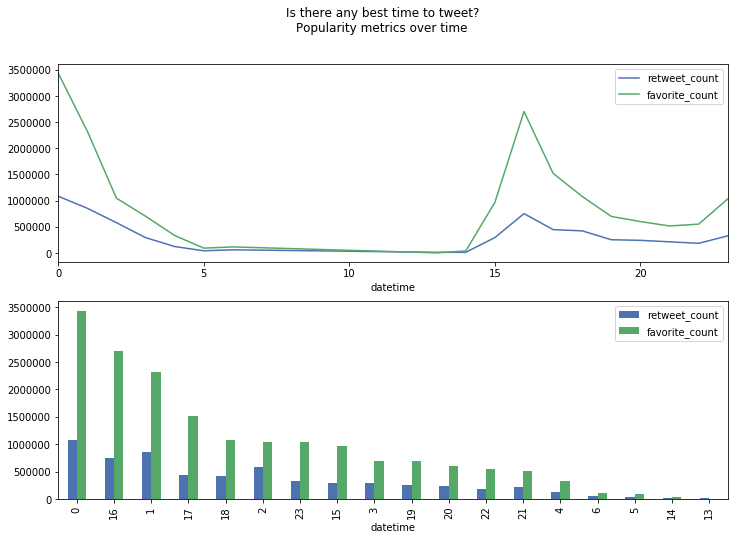

In [46]:
#Plotting
plt.figure()
figure, axes = plt.subplots(2, 1)
figure.set_figheight(8)
figure.set_figwidth(12)
figure.suptitle('Is there any best time to tweet?\nPopularity metrics over time')
time.groupby(by=time['datetime'].dt.hour).sum().plot(ax=axes[0])
time.groupby(by=time['datetime'].dt.hour).sum().sort_values(by=['favorite_count','retweet_count'],ascending=False).plot(kind='bar', ax=axes[1])

In [47]:
#Save figure
plt.savefig('time_popularity.png')

According to the chart shown above the best timeframes to tweet are at 0-1 AM and at 16-17 PM. Those timeframes might correspond to the spare time of the followers, namely after work hours (16-17 PM) and before bed (0-1 AM). 

There might be limitations due to different time zones.

### 3. Is there any correlation between popularity metrics and the lenght of the text?

In [48]:
#Print out correlation matrix
df[['text_lenght','retweet_count','favorite_count']].corr()

,text_lenght,retweet_count,favorite_count
text_lenght,1.000000,-0.095816,-0.087495
retweet_count,-0.095816,1.000000,0.790476
favorite_count,-0.087495,0.790476,1.000000


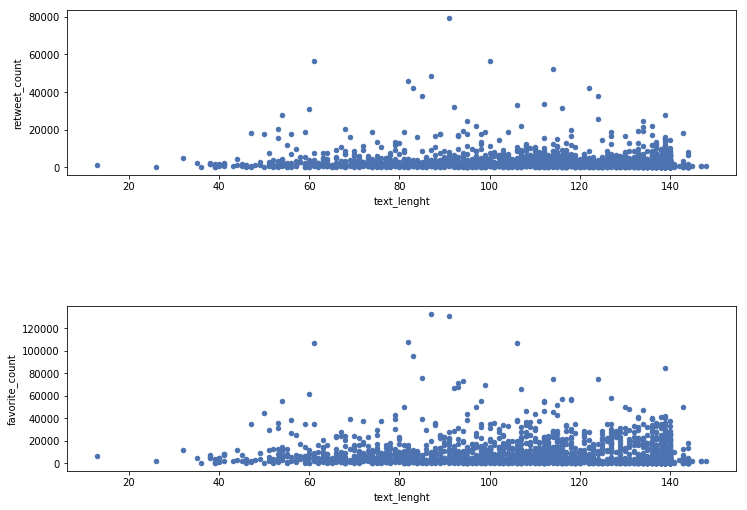

In [49]:
#Plot correlation
plt.figure()
figure, axes = plt.subplots(2, 1)
figure.set_figheight(8)
figure.set_figwidth(12)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.8)
df.plot(kind='scatter', x='text_lenght', y='retweet_count', ax=axes[0])
df.plot(kind='scatter', x='text_lenght', y='favorite_count', ax=axes[1])

There is no correlation between the variables 'favorite_count', 'retweet_count' and 'text_lengh'. It may be due to the presence of outliers, so the next step will be to remove values above and below a certain threshold.

In [50]:
#Remove outliers in favorite_count
favorite_q1=df['favorite_count'].quantile(0.25)
favorite_q3=df['favorite_count'].quantile(0.75)
favorite_iqr=favorite_q3-favorite_q1
favorite_not_outliers=df[(df['favorite_count']>(favorite_q1-1.5*favorite_iqr))&(df['favorite_count']<(favorite_q3+1.5*favorite_iqr))][['favorite_count','text_lenght']]

In [51]:
#Remove outliers in retweet_count
retweet_q1=df['retweet_count'].quantile(0.25)
retweet_q3=df['retweet_count'].quantile(0.75)
retweet_iqr=retweet_q3-retweet_q1
retweet_not_outliers=df[(df['retweet_count']>(retweet_q1-1.5*retweet_iqr))&(df['retweet_count']<(retweet_q3+1.5*retweet_iqr))][['retweet_count','text_lenght']]

In [52]:
#Print correlations
favorite_not_outliers.corr(), retweet_not_outliers.corr()

(                favorite_count  text_lenght
 favorite_count        1.000000    -0.111816
 text_lenght          -0.111816     1.000000,
                retweet_count  text_lenght
 retweet_count       1.000000    -0.087301
 text_lenght        -0.087301     1.000000)

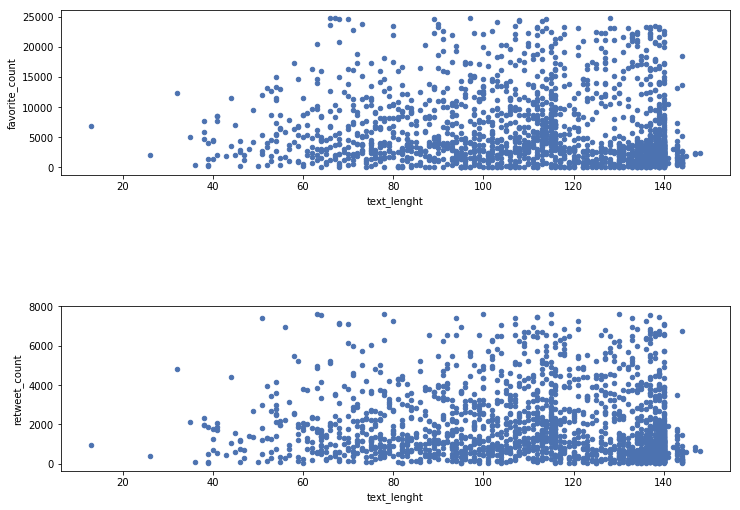

In [53]:
#Plot correlation
plt.figure()
figure, axes = plt.subplots(2, 1)
figure.set_figheight(8)
figure.set_figwidth(12)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.8)
favorite_not_outliers.plot(kind='scatter', x='text_lenght', y='favorite_count', ax=axes[0])
retweet_not_outliers.plot(kind='scatter', x='text_lenght', y='retweet_count', ax=axes[1])

In [54]:
#Save figure
plt.savefig('Popularity_text_lenght.png')

There is no correlation between popularity metrics and text lenght hinting that a longer tweet leads to more popularity.